# Filtro de Média Geométrica
O filtro de média geométrica é um filtro espacial não-linear de suavização de imagens e sinais. Consiste na aplicação da fórmula $$\hat{f}(x, y) = [\prod _{(s,t) \in S_{xy}} f(s,t)]^{\frac{1}{mn}} $$ na imagem, de forma que a intensidade de dado pixel seja a média geométrica dos valores dos pixels em determinada vizinhança $m x n$.

### Implementação da Função

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def geometric_mean(img, m, n):
    '''Calcula a média geométrica na imagem img com um filtro de tamanho m por n.

        Parâmetros
        ----------
        img : numpy array.
            Imagem a ser filtrada.
        m : uint
            Número de linhas para o filtro.
        n : uint
            Número de colunas para o filtro.
        Return
        -------
        img_filtered : numpy array, mesmo tamanho que img
            Imagem filtrada
    '''

    num_rows, num_cols = img.shape

    # Cria imagem com zeros ao redor da borda
    half_row_size = m//2
    half_col_size = n//2
    img_padded = np.pad(img, ((half_row_size,half_row_size),
                              (half_col_size,half_col_size)),
                        mode='constant')

    # Aplicação do filtro de média geométrica
    img_filtered = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            product_region = 1
            for s in range(m):
                for t in range(n):
                    # Pequena alteração na fórmula para impedir overflow durante
                    # a multiplicação, considera a propriedade da exponencial de 
                    # que (a * b)^n == a^n * b^n
                    product_region *= (img_padded[row+s, col+t])**(1./(m*n))
            img_filtered[row, col] = product_region

    return img_filtered

In [3]:
# Leitura da imagem
img = plt.imread('cameraman.tiff')

# Aplicação do filtro de suavização usando média geométrica
img_smooth = geometric_mean(img, m=3, n=3)

Text(0.5, 1.0, 'Imagem com Filtro de Média Geométrica')

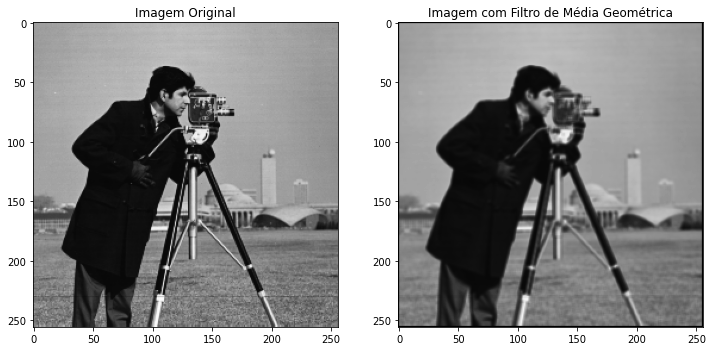

In [4]:
# Imprimindo as duas imagens
plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.imshow(img_smooth, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com Filtro de Média Geométrica")


# Filtro de Mediana
Texto mediana

In [5]:
def mediana(img,tam_filtr):
    num_row, num_col = img.shape
    meio_filtro = tam_filtr//2   
    img_padded = np.pad(img, ((meio_filtro,meio_filtro),
                              (meio_filtro,meio_filtro)),
                        mode='symmetric')
    img_mediada = np.zeros((num_row,num_col))
    for row in range(num_row-1):
        for col in range(num_col-1):
            #vetor_ = list(img_padded[row:row+2*meio_filtro][col:col+2*meio_filtro])
            vetor_a = []
            for k in range(tam_filtr):
                for y in range(tam_filtr):
                    vetor_a.append(img_padded[row+k][col+y])
            vetor_a = np.sort(vetor_a)
            mediana = len(vetor_a)//2
            if(len(vetor_a)%2 == 0):
                img_mediada[row][col] = ((vetor_a[mediana-1]*0.5)+(vetor_a[mediana]*0.5)).astype('uint8')
            else:
                img_mediada[row][col] = vetor_a[mediana]
    return img_mediada

In [8]:
img = plt.imread('cameraman.tiff')
img_mediada = mediana(img,5)

Text(0.5, 1.0, 'Imagem com Filtro de Mediana')

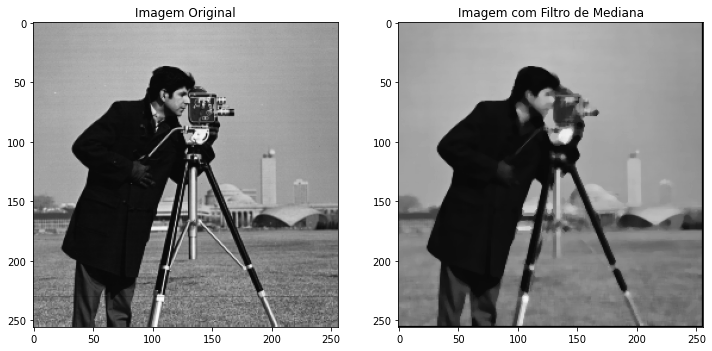

In [10]:
plt.figure(figsize = [12,7])
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.imshow(img_mediada, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com Filtro de Mediana")

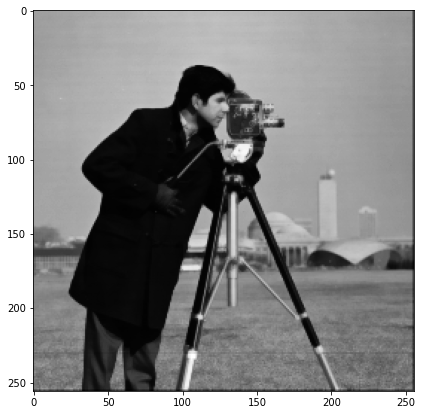

In [11]:
testando_neh = img[:][:] + img_mediada[:][:]
plt.figure(figsize = [12,7])
plt.imshow(testando_neh, cmap='gray')